In [1]:
import ROOT as rt
import uproot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import aghast

In [2]:
def np_to_root(numpy_hist, name='root_hist'):
    ghastly_hist = aghast.from_numpy(numpy_hist)
    return aghast.to_root(ghastly_hist, name)

def get_max_notrunc(hist, cl = 0.95):
    normcumsum  = 1.*np.cumsum(hist[0])/sum(hist[0])
    return int(hist[1][np.argmax(normcumsum>cl)])

In [3]:
upfile = uproot.open('perfTuple_scenarioB.root')
tree = upfile['ntuple/tree']

In [4]:
def get_hists(objs=['Calo'],detector='Barrel', split=0.5):
    arrays = []
    for obj in objs:
        var = 'l1pfProducer%svecNL1%s'%(detector,obj)
        mask = tree.array('mc_id')==998
        array = tree.pandas.df([var]).values
        array = np.reshape(array, (tree.numentries, -1))
        array = array[mask]
        arrays.append(array)
    array = np.sum(arrays,axis=0)
    nregions = array.shape[1]
    array[:,::-1].sort(axis=-1)
    top_N = array[:,:int(split*nregions)]
    top_N_max = np.amax(top_N, axis=-1)
    bins = np.linspace(0, np.max(array)+2,  np.max(array)+3)
    top_N_max_hist = np.histogram(top_N_max,bins=bins)
    top_notrunc = get_max_notrunc(top_N_max_hist) 
    plt.figure(figsize=(5,5))
    if split<1:
        bot_N = array[:,int(split*nregions):]
        bot_N_max = np.amax(bot_N, axis=-1)
        bot_N_max_hist = np.histogram(bot_N_max,bins=bins)
        bot_notrunc = get_max_notrunc(bot_N_max_hist) 
        plt.hist(top_N_max,bins=bins,alpha=0.7,label = 'top %i%%, 95%% no trunc: %i'%(split*100, top_notrunc))
        plt.hist(bot_N_max,bins=bins,alpha=0.7,label='bottom %i%%, 95%% no trunc: %i'%((1-split)*100, bot_notrunc))
    else:   
        plt.hist(top_N_max,bins=bins,alpha=0.7,label = '95%% no trunc: %i'%(top_notrunc))
    plt.semilogy()
    if len(objs) > 2:
        plt.xlabel('Max %s in %s region'%('+'.join(objs), detector), fontsize=6)
    else:
        plt.xlabel('Max %s in %s region'%('+'.join(objs), detector))
    plt.xlim(0, np.max(array)+3)
    plt.ylabel('Events')
    plt.legend()
    plt.savefig('%sMax%sSplit%s.pdf'%(''.join(objs),detector,int(split*100)))
    if split<1:
        return top_N_max_hist, bot_N_max_hist
    else:
        return top_N_max_hist, None

def get_arrays(objs=['Calo'],detectors=['Barrel']):
    for detector in detectors:
        for obj in objs:
            var = 'l1pfProducer%svecNL1%s'%(detector,obj)
            array = tree.pandas.df([var]).values
            array = np.reshape(array, (tree.numentries, -1))
            nregions = array.shape[1]
            print(array.shape)           
#get_arrays(objs=['Calo', 'EmCalo', 'TK', 'Mu'],detectors=['Barrel', 'HGCal', 'HGCalNoTK', 'HF'])
#print(tree.keys())

/Users/jduarte1/miniconda2/envs/keras-training/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


('Calo', 'Barrel', '95% no trunc.', 'top', 17, 'bottom', 10)
('Calo', 'HGCal', '95% no trunc.', 'top', 58, 'bottom', 46)
('Calo', 'HGCalNoTK', '95% no trunc.', 'top', 37, 'bottom', 31)
('Calo', 'HF', '95% no trunc.', 'top', 16, 'bottom', 11)
('EmCalo', 'Barrel', '95% no trunc.', 'top', 13, 'bottom', 4)
('EmCalo', 'HGCal', '95% no trunc.', 'top', 0, 'bottom', 0)
('EmCalo', 'HGCalNoTK', '95% no trunc.', 'top', 0, 'bottom', 0)
('EmCalo', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('TK', 'Barrel', '95% no trunc.', 'top', 24, 'bottom', 10)
('TK', 'HGCal', '95% no trunc.', 'top', 19, 'bottom', 9)
('TK', 'HGCalNoTK', '95% no trunc.', 'top', 6, 'bottom', 2)
('TK', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('Mu', 'Barrel', '95% no trunc.', 'top', 2, 'bottom', 0)
('Mu', 'HGCal', '95% no trunc.', 'top', 2, 'bottom', 0)
('Mu', 'HGCalNoTK', '95% no trunc.', 'top', 1, 'bottom', 0)
('Mu', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)


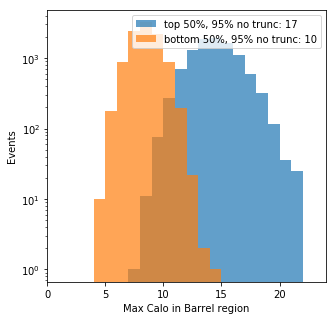

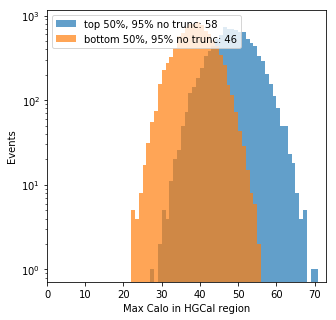

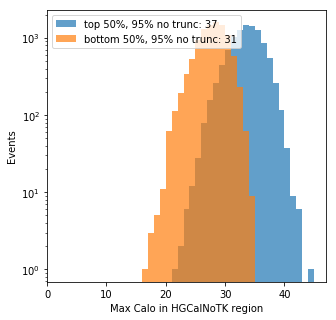

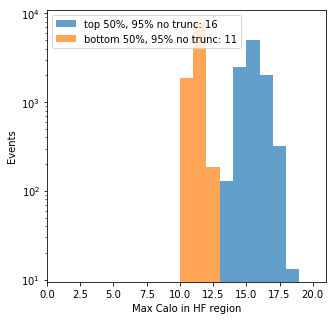

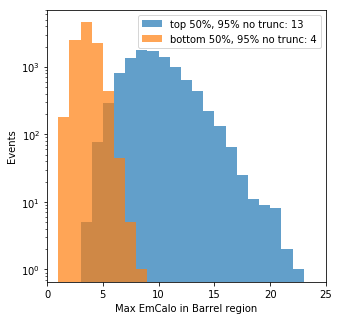

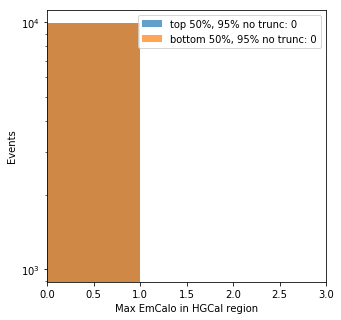

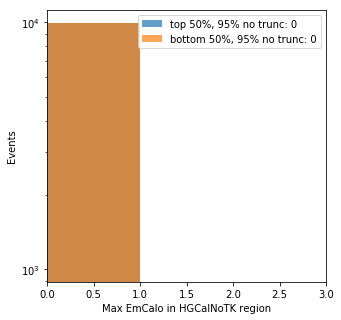

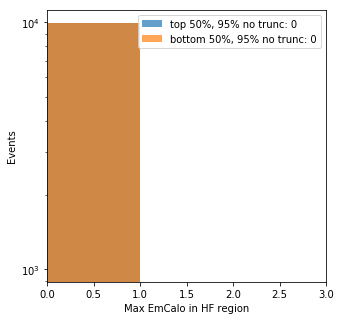

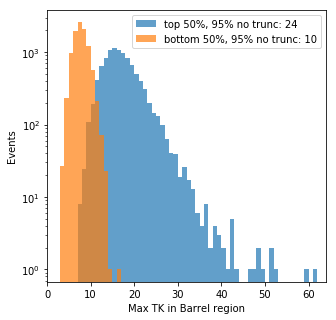

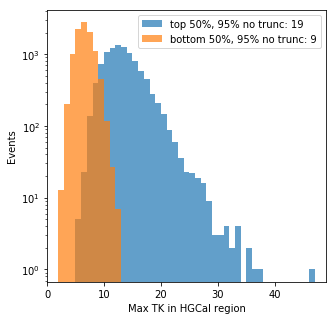

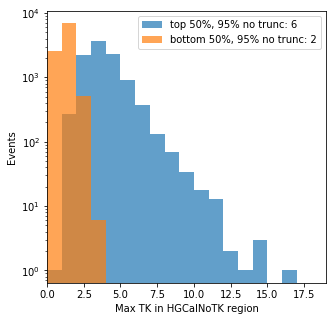

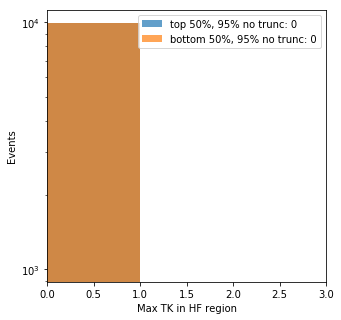

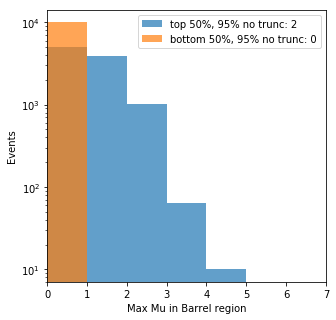

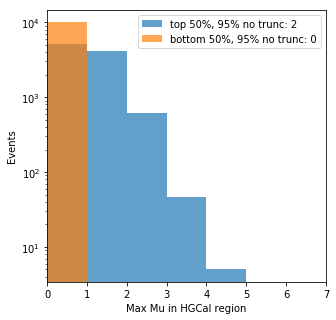

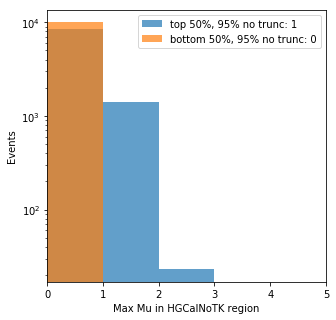

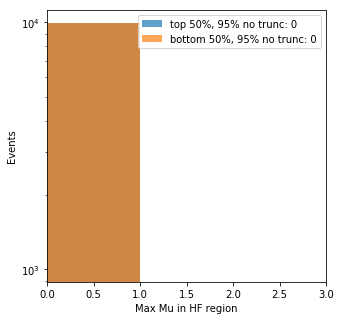

In [5]:
for obj in ['Calo', 'EmCalo', 'TK', 'Mu']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(objs=[obj], detector=detector, split=0.5)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        bot_N_max_hist_95cl = get_max_notrunc(bot_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl, 'bottom', bot_N_max_hist_95cl)

/Users/jduarte1/miniconda2/envs/keras-training/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


('PFChargedHadron', 'Barrel', '95% no trunc.', 'top', 13)
('PFChargedHadron', 'HGCal', '95% no trunc.', 'top', 8)
('PFChargedHadron', 'HGCalNoTK', '95% no trunc.', 'top', 0)
('PFChargedHadron', 'HF', '95% no trunc.', 'top', 0)
('PFNeutralHadron', 'Barrel', '95% no trunc.', 'top', 6)
('PFNeutralHadron', 'HGCal', '95% no trunc.', 'top', 14)
('PFNeutralHadron', 'HGCalNoTK', '95% no trunc.', 'top', 9)
('PFNeutralHadron', 'HF', '95% no trunc.', 'top', 7)
('PFElectron', 'Barrel', '95% no trunc.', 'top', 3)
('PFElectron', 'HGCal', '95% no trunc.', 'top', 7)
('PFElectron', 'HGCalNoTK', '95% no trunc.', 'top', 0)
('PFElectron', 'HF', '95% no trunc.', 'top', 0)
('PFPhoton', 'Barrel', '95% no trunc.', 'top', 9)
('PFPhoton', 'HGCal', '95% no trunc.', 'top', 21)
('PFPhoton', 'HGCalNoTK', '95% no trunc.', 'top', 13)
('PFPhoton', 'HF', '95% no trunc.', 'top', 0)
('PFMuon', 'Barrel', '95% no trunc.', 'top', 1)
('PFMuon', 'HGCal', '95% no trunc.', 'top', 1)
('PFMuon', 'HGCalNoTK', '95% no trunc.', 'top

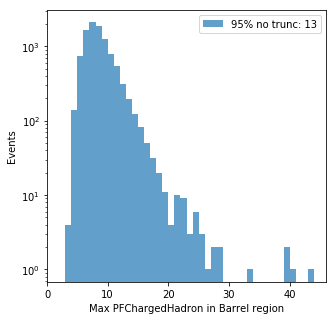

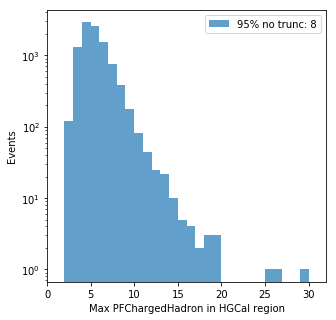

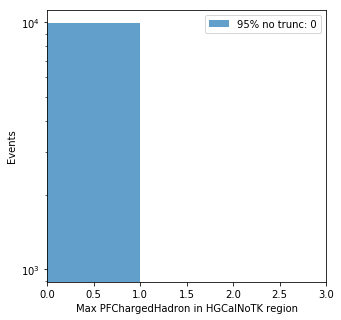

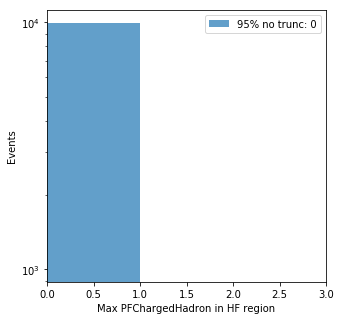

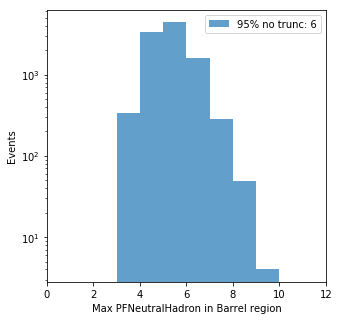

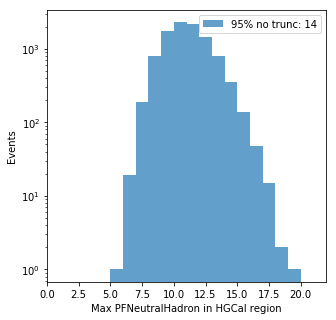

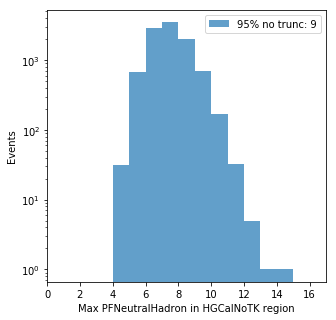

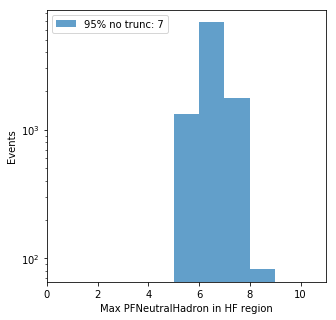

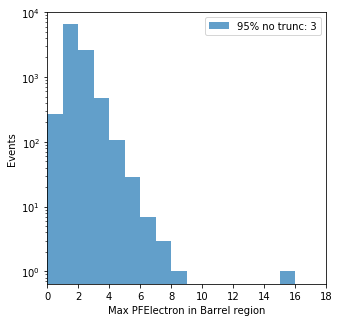

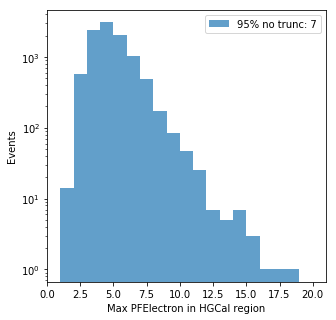

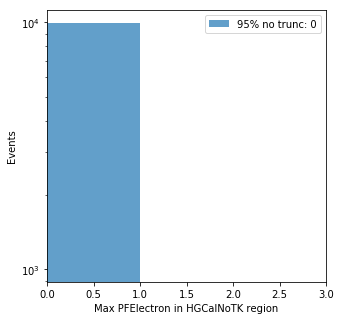

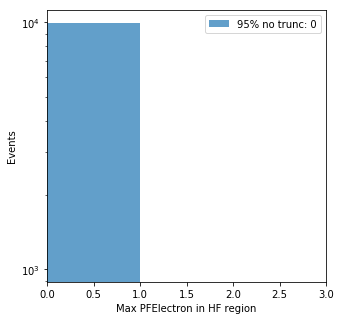

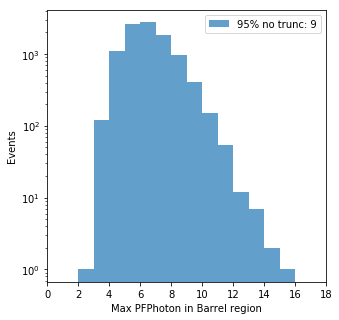

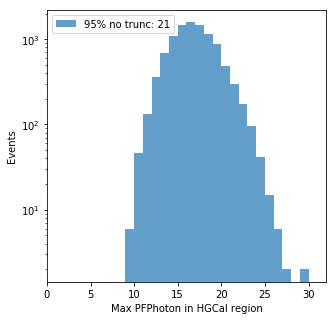

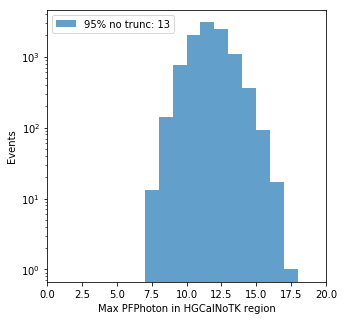

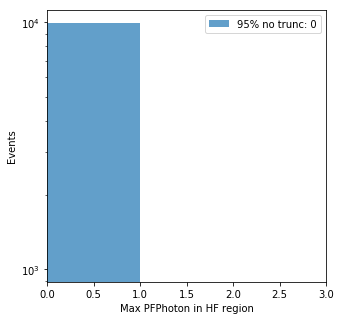

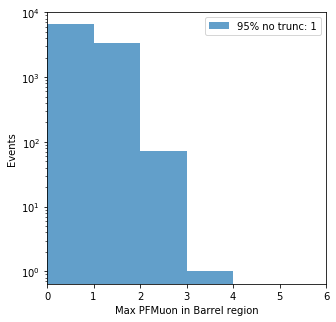

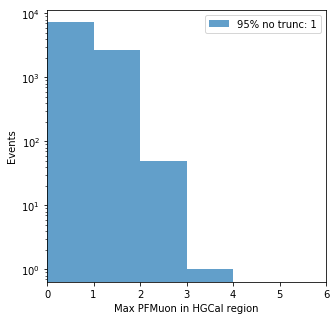

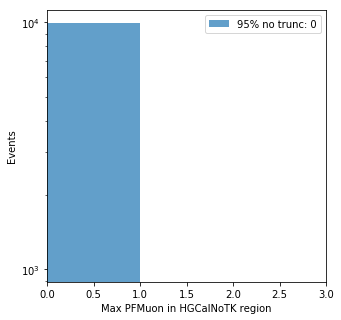

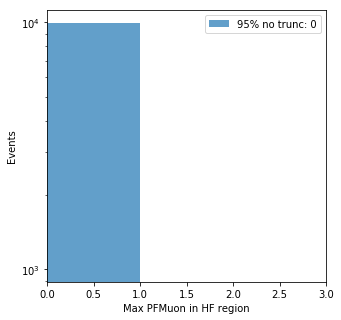

In [6]:
for obj in ['PFChargedHadron','PFNeutralHadron', 'PFElectron','PFPhoton', 'PFMuon']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(objs=[obj], detector=detector, split=1)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl)

/Users/jduarte1/miniconda2/envs/keras-training/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


('PuppiChargedHadron', 'Barrel', '95% no trunc.', 'top', 9)
('PuppiChargedHadron', 'HGCal', '95% no trunc.', 'top', 6)
('PuppiChargedHadron', 'HGCalNoTK', '95% no trunc.', 'top', 0)
('PuppiChargedHadron', 'HF', '95% no trunc.', 'top', 0)
('PuppiNeutralHadron', 'Barrel', '95% no trunc.', 'top', 2)
('PuppiNeutralHadron', 'HGCal', '95% no trunc.', 'top', 2)
('PuppiNeutralHadron', 'HGCalNoTK', '95% no trunc.', 'top', 2)
('PuppiNeutralHadron', 'HF', '95% no trunc.', 'top', 1)
('PuppiElectron', 'Barrel', '95% no trunc.', 'top', 2)
('PuppiElectron', 'HGCal', '95% no trunc.', 'top', 5)
('PuppiElectron', 'HGCalNoTK', '95% no trunc.', 'top', 0)
('PuppiElectron', 'HF', '95% no trunc.', 'top', 0)
('PuppiPhoton', 'Barrel', '95% no trunc.', 'top', 6)
('PuppiPhoton', 'HGCal', '95% no trunc.', 'top', 5)
('PuppiPhoton', 'HGCalNoTK', '95% no trunc.', 'top', 2)
('PuppiPhoton', 'HF', '95% no trunc.', 'top', 0)
('PuppiMuon', 'Barrel', '95% no trunc.', 'top', 1)
('PuppiMuon', 'HGCal', '95% no trunc.', 'top'

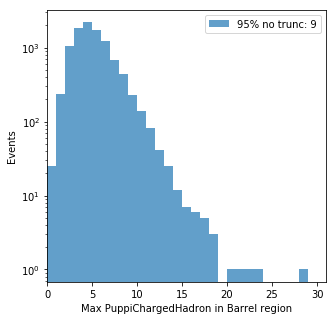

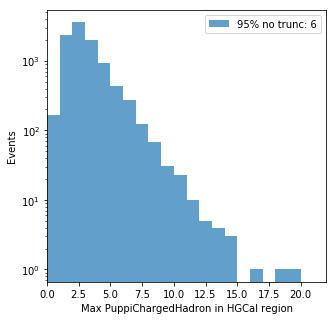

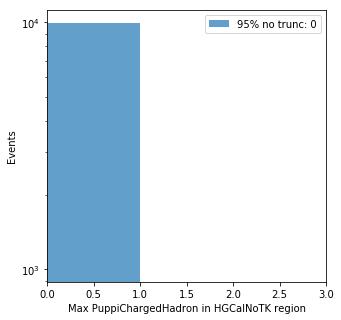

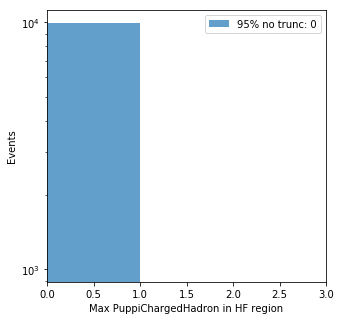

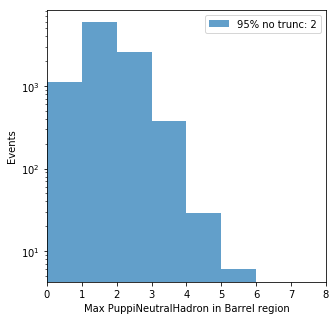

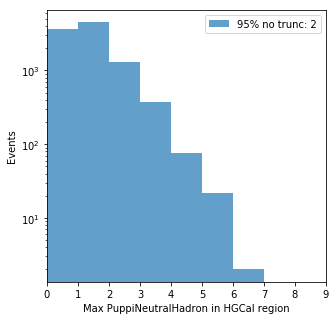

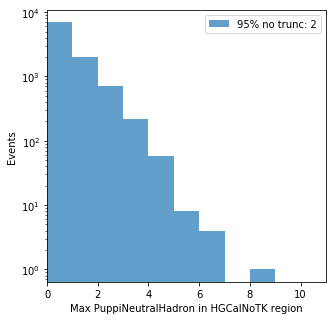

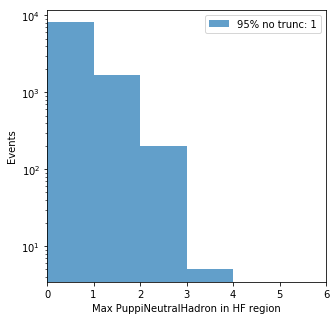

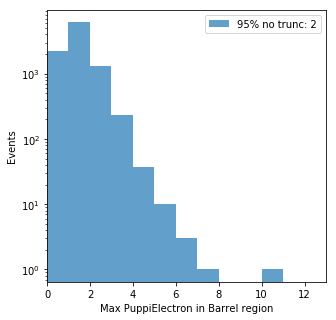

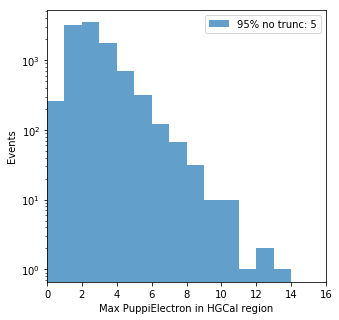

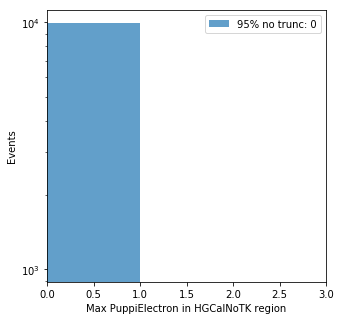

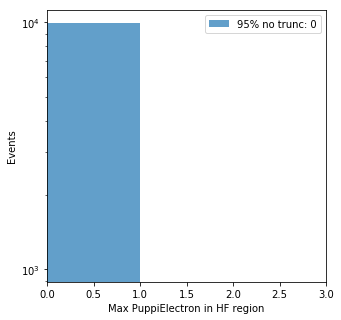

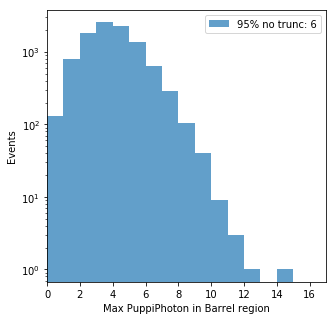

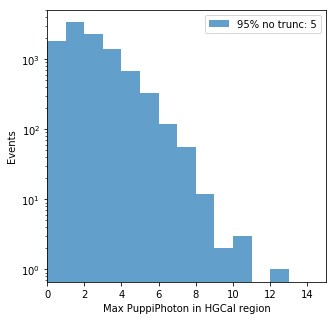

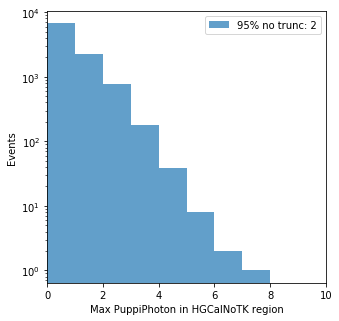

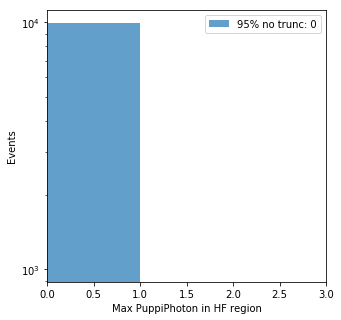

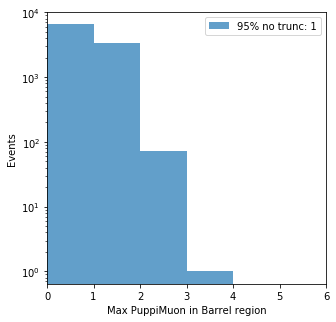

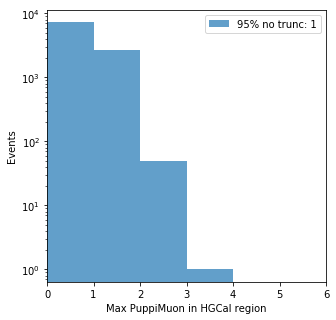

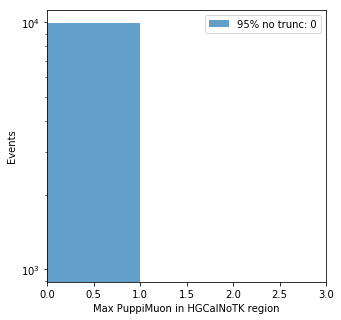

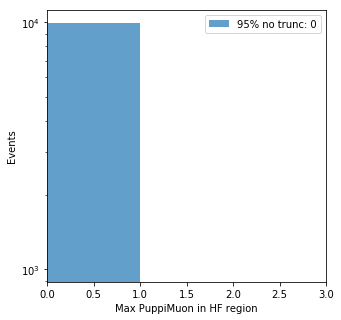

In [7]:
for obj in ['PuppiChargedHadron','PuppiNeutralHadron', 'PuppiElectron','PuppiPhoton', 'PuppiMuon']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(objs=[obj], detector=detector, split=1)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl)

/Users/jduarte1/miniconda2/envs/keras-training/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


('PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon', 'Barrel', '95% no trunc.', 'top', 15)
('PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon', 'HGCal', '95% no trunc.', 'top', 13)
('PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon', 'HGCalNoTK', '95% no trunc.', 'top', 3)
('PuppiChargedHadron+PuppiNeutralHadron+PuppiElectron+PuppiPhoton+PuppiMuon', 'HF', '95% no trunc.', 'top', 1)


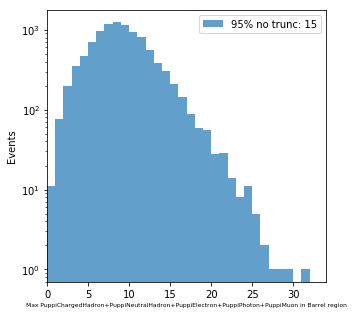

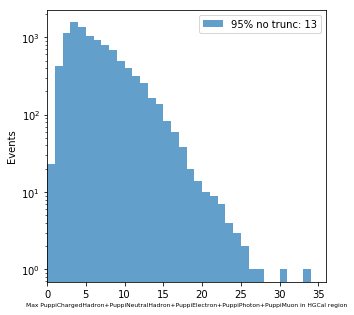

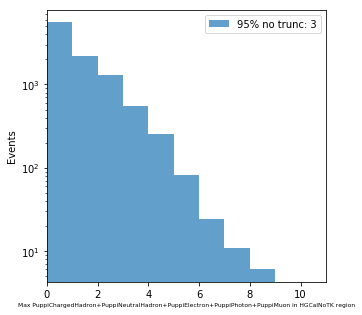

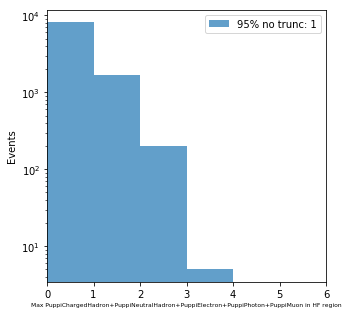

In [8]:
for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
    objs = ['PuppiChargedHadron','PuppiNeutralHadron', 'PuppiElectron','PuppiPhoton', 'PuppiMuon']
    top_N_max_hist, bot_N_max_hist = get_hists(objs=objs, detector=detector, split=1)
    top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
    print('+'.join(objs), detector, '95% no trunc.', 'top', top_N_max_hist_95cl)

/Users/jduarte1/miniconda2/envs/keras-training/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


('PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon', 'Barrel', '95% no trunc.', 'top', 22)
('PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon', 'HGCal', '95% no trunc.', 'top', 36)
('PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon', 'HGCalNoTK', '95% no trunc.', 'top', 16)
('PFChargedHadron+PFNeutralHadron+PFElectron+PFPhoton+PFMuon', 'HF', '95% no trunc.', 'top', 7)


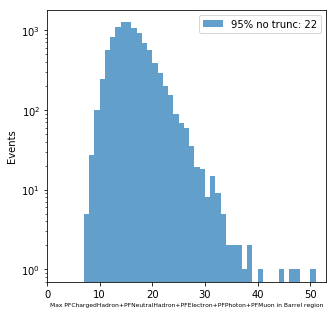

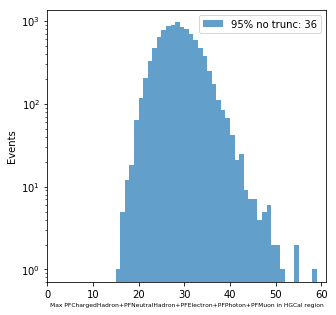

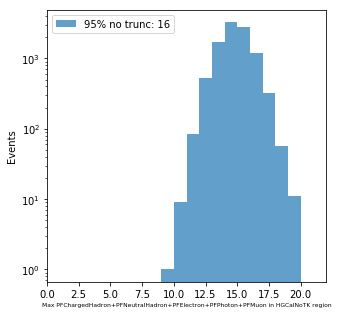

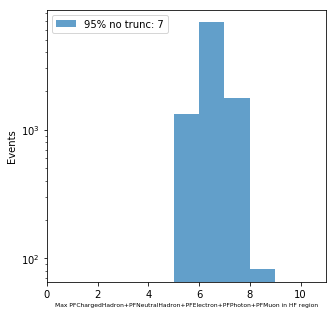

In [9]:
for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
    objs = ['PFChargedHadron','PFNeutralHadron', 'PFElectron','PFPhoton', 'PFMuon']
    top_N_max_hist, bot_N_max_hist = get_hists(objs=objs, detector=detector, split=1)
    top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
    print('+'.join(objs), detector, '95% no trunc.', 'top', top_N_max_hist_95cl)